In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

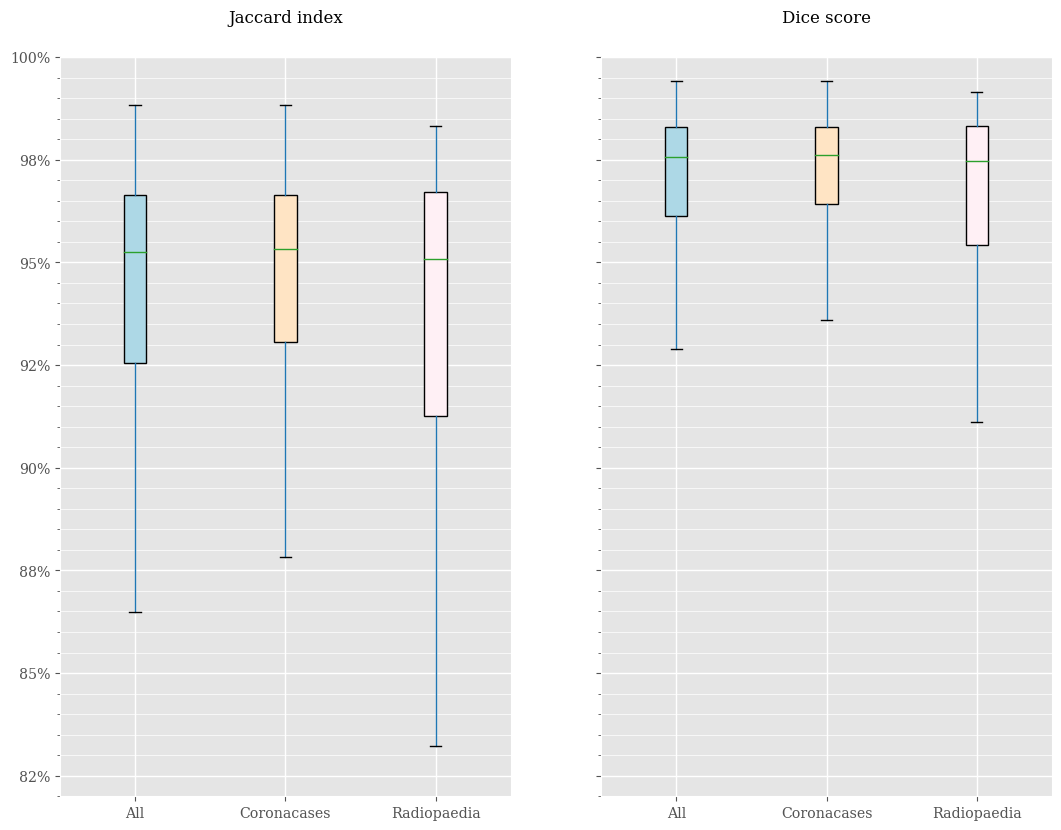

In [31]:
PYPLOT_PLOT_WIDTH = 1280
PYPLOT_PLOT_HEIGHT = 960
PYPLOT_PLOT_DPI = 100
PYPLOT_SIZE = 12
PYPLOT_FONT_FAMILY = 'serif'
PYPLOT_LEGEND_FONT_SIZE = 'large'
PYPLOT_LEGEND_FACE_COLOR = 'white'
PYPLOT_FIGURE_SIZE = (10, 8)
PYPLOT_AXES_LABEL_SIZE = PYPLOT_SIZE
PYPLOT_AXES_TITLE_SIZE = PYPLOT_SIZE
PYPLOT_GRID_COLOR = 'white'
PYPLOT_XTICK_LABEL_SIZE = PYPLOT_SIZE * 0.85
PYPLOT_YTICK_LABEL_SIZE = PYPLOT_SIZE * 0.85
PYPLOT_TICK_FONT_COLOR = '#535353'
PYPLOT_AXES_TITLE_PAD = 25
PYPLOT_AXES_EDGE_COLOR = 'white'
PYPLOT_AXES_FACE_COLOR = '#e5e5e5'
PYPLOT_FIGURE_FACECOLOR = 'white'

parameters = {
    'font.family': PYPLOT_FONT_FAMILY,
    'legend.fontsize': PYPLOT_LEGEND_FONT_SIZE,
    'legend.facecolor': PYPLOT_LEGEND_FACE_COLOR,
    'figure.figsize': PYPLOT_FIGURE_SIZE,
    'axes.labelsize': PYPLOT_AXES_LABEL_SIZE,
    'axes.titlesize': PYPLOT_AXES_TITLE_SIZE,
    'grid.color': PYPLOT_GRID_COLOR,
    'xtick.labelsize': PYPLOT_XTICK_LABEL_SIZE,
    'ytick.labelsize': PYPLOT_YTICK_LABEL_SIZE,
    'axes.titlepad': PYPLOT_AXES_TITLE_PAD,
    'axes.edgecolor': PYPLOT_AXES_EDGE_COLOR,
    'axes.facecolor': PYPLOT_AXES_FACE_COLOR,
    'xtick.color': PYPLOT_TICK_FONT_COLOR,
    'ytick.color': PYPLOT_TICK_FONT_COLOR,
    'figure.facecolor': PYPLOT_FIGURE_FACECOLOR,
    'axes.formatter.use_locale': True
}

plt.rcParams.update(parameters)
figure_size = (
    PYPLOT_PLOT_WIDTH / PYPLOT_PLOT_DPI,
    PYPLOT_PLOT_HEIGHT / PYPLOT_PLOT_DPI)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figure_size, dpi=PYPLOT_PLOT_DPI)

# ax = plt.gca()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=False))
ax1.set_ylim(0.82, 1.0)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=False))
ax2.set_ylim(0.82, 1.0)
# ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())
ax1.yaxis.set_minor_locator(mtick.AutoMinorLocator())
# ax2.xaxis.set_minor_locator(mtick.AutoMinorLocator())
ax2.yaxis.set_minor_locator(mtick.AutoMinorLocator())
ax1.grid(linewidth=1, which='major')
ax1.grid(linewidth=0.5, which='minor')
ax2.grid(linewidth=1, which='major')
ax2.grid(linewidth=0.5, which='minor')

df_all = pd.read_csv('../working_data/results.backup/2023-05-19/2. Todo el dataset/4/raw_data/3. All together/raw_data.csv')
df_all.rename(columns={
    'jaccard': 'jaccard_all',
    'dice': 'dice_all',
}, inplace=True)
df_coronacases = pd.read_csv('../working_data/results.backup/2023-05-19/2. Todo el dataset/4/raw_data/2. Per source/coronacases_raw_data.csv')
df_coronacases.rename(columns={
    'jaccard': 'jaccard_coronacases',
    'dice': 'dice_coronacases',
}, inplace=True)
df_radiopaedia = pd.read_csv('../working_data/results.backup/2023-05-19/2. Todo el dataset/4/raw_data/2. Per source/radiopaedia_raw_data.csv')
df_radiopaedia.rename(columns={
    'jaccard': 'jaccard_radiopaedia',
    'dice': 'dice_radiopaedia',
}, inplace=True)

df_all.boxplot(
    column=['jaccard_all'],
    positions=[0],
    showfliers=False,
    patch_artist=True,
    boxprops={'facecolor': 'lightblue'},
    ax=ax1)
df_coronacases.boxplot(
    column=['jaccard_coronacases'],
    positions=[1],
    showfliers=False,
    patch_artist=True,
    boxprops={'facecolor': 'bisque'},
    ax=ax1)
df_radiopaedia.boxplot(
    column=['jaccard_radiopaedia'],
    positions=[2],
    showfliers=False,
    patch_artist=True,
    boxprops={'facecolor': 'lavenderblush'},
    ax=ax1)
df_all.boxplot(
    column=['dice_all'],
    positions=[0],
    showfliers=False,
    patch_artist=True,
    boxprops={'facecolor': 'lightblue'},
    ax=ax2)
df_coronacases.boxplot(
    column=['dice_coronacases'],
    positions=[1],
    showfliers=False,
    patch_artist=True,
    boxprops={'facecolor': 'bisque'},
    ax=ax2)
df_radiopaedia.boxplot(
    column=['dice_radiopaedia'],
    positions=[2],
    showfliers=False,
    patch_artist=True,
    boxprops={'facecolor': 'lavenderblush'},
    ax=ax2)

# plt.xticks(rotation=45, ha='right')
ax1.set_title('Jaccard index')
ax2.set_title('Dice score')
ax1.set_xticks([0, 1, 2], ['All', 'Coronacases', 'Radiopaedia'])
ax2.set_xticks([0, 1, 2], ['All', 'Coronacases', 'Radiopaedia'])
ax2.set_yticklabels([])
plt.show()
fig.savefig('boxplot.png', bbox_inches='tight')